Database1 to Database2

In [38]:
'''
Initially, brightness adjustments were
applied to the images in DataBase1, encompassing both brightening and darkening, as
shown in the lower half of the figure. Subsequently, each image undergoes cropping and
resizing, jitter, occlusion, rotation, and shearing to yield DataBase2
'''

'\nInitially, brightness adjustments were\napplied to the images in DataBase1, encompassing both brightening and darkening, as\nshown in the lower half of the figure. Subsequently, each image undergoes cropping and\nresizing, jitter, occlusion, rotation, and shearing to yield DataBase2\n'

In [39]:
''' 
Data Path: ../data/ExDark
12 Subdirectories: Bicycle, Boat, Bottle, Bus, Car, Cat, Chair, Cup, Dog, Motorbike, People, Table
Each subdirectory contains some png images
'''

' \nData Path: ../data/ExDark\n12 Subdirectories: Bicycle, Boat, Bottle, Bus, Car, Cat, Chair, Cup, Dog, Motorbike, People, Table\nEach subdirectory contains some png images\n'

In [40]:
# First apply brightness adjustments to the images in DataBase1: both brightening and darkening
import cv2
import numpy as np
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

In [41]:
def adjust_brightness(img, alpha, beta):
    '''
    Adjust the brightness of an image
    :param img: image to adjust
    :param alpha: contrast control (1.0-3.0)
    :param beta: brightness control (0-100)
    :return: adjusted image
    '''
    adjusted = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    return adjusted

In [42]:
# Load the dataset
data_path = '../data/ExDark'
subdirs = os.listdir(data_path)
print(subdirs)

['Dog', 'Motorbike', 'Boat', 'Bus', 'Cat', 'People', 'Bottle', 'Bicycle', 'Table', 'Car', 'Cup', 'Chair']


In [43]:
# Apply brightness adjustments to the images in DataBase1


In [44]:
# for subdir in subdirs:
#     subdir_path = os.path.join(data_path, subdir)
#     images = os.listdir(subdir_path)
#     for image in images:
#         image_path = os.path.join(subdir_path, image)
#         img = cv2.imread(image_path)
#         # Brightening
#         brightened = adjust_brightness(img, alpha=2.0, beta=50)
#         # Darkening
#         darkened = adjust_brightness(img, alpha=0.5, beta=50)
#         # Save the images
#         cv2.imwrite(os.path.join(subdir_path, 'brightened_' + image), brightened)
#         cv2.imwrite(os.path.join(subdir_path, 'darkened_' + image), darkened)

        # Display the images
        # plt.figure()
        # plt.subplot(131)
        # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        # plt.title('Original')
        # plt.subplot(132)
        # plt.imshow(cv2.cvtColor(brightened, cv2.COLOR_BGR2RGB))
        # plt.title('Brightened')
        # plt.subplot(133)
        # plt.imshow(cv2.cvtColor(darkened, cv2.COLOR_BGR2RGB))
        # plt.title('Darkened')
        # plt.show()

    #     break
    # break

In [45]:
def crop_and_resize(img, crop_size, resize_size):
    '''
    Crop and resize an image
    :param img: image to crop and resize
    :param crop_size: size of the crop
    :param resize_size: size of the resize
    :return: cropped and resized image
    '''
    h, w = img.shape[:2]
    x = random.randint(0, h - crop_size)
    y = random.randint(0, w - crop_size)
    cropped = img[x:x+crop_size, y:y+crop_size]
    resized = cv2.resize(cropped, (resize_size, resize_size))
    return resized

In [46]:
def jitter(img, jitter_size):
    '''
    Apply jitter to an image
    :param img: image to apply jitter
    :param jitter_size: size of the jitter
    :return: jittered image
    '''
    h, w = img.shape[:2]
    x = random.randint(-jitter_size, jitter_size)
    y = random.randint(-jitter_size, jitter_size)
    M = np.float32([[1, 0, x], [0, 1, y]])
    jittered = cv2.warpAffine(img, M, (w, h))
    return jittered

In [47]:
def occlude(img, occlude_size):
    '''
    Occlude an image
    :param img: image to occlude
    :param occlude_size: size of the occlusion
    :return: occluded image
    '''
    h, w = img.shape[:2]
    x = random.randint(0, h - occlude_size)
    y = random.randint(0, w - occlude_size)
    img[x:x+occlude_size, y:y+occlude_size] = 0
    return img

In [48]:
def rotate(img, angle):
    '''
    Rotate an image
    :param img: image to rotate
    :param angle: angle of rotation
    :return: rotated image
    '''
    h, w = img.shape[:2]
    M = cv2.getRotationMatrix2D((w/2, h/2), angle, 1)
    rotated = cv2.warpAffine(img, M, (w, h))
    return rotated

In [49]:
def shear(img, shear_factor):
    '''
    Shear an image
    :param img: image to shear
    :param shear_factor: factor of shear
    :return: sheared image
    '''
    h, w = img.shape[:2]
    M = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    sheared = cv2.warpAffine(img, M, (w, h))
    return sheared

In [50]:
# Apply cropping and resizing, jitter, occlusion, rotation, and shearing to all the images and save in a new directory

# Parameters
crop_size = 224
resize_size = 224
jitter_size = 50
occlude_size = 50
angle = 30
shear_factor = 0.5



<Figure size 640x480 with 0 Axes>

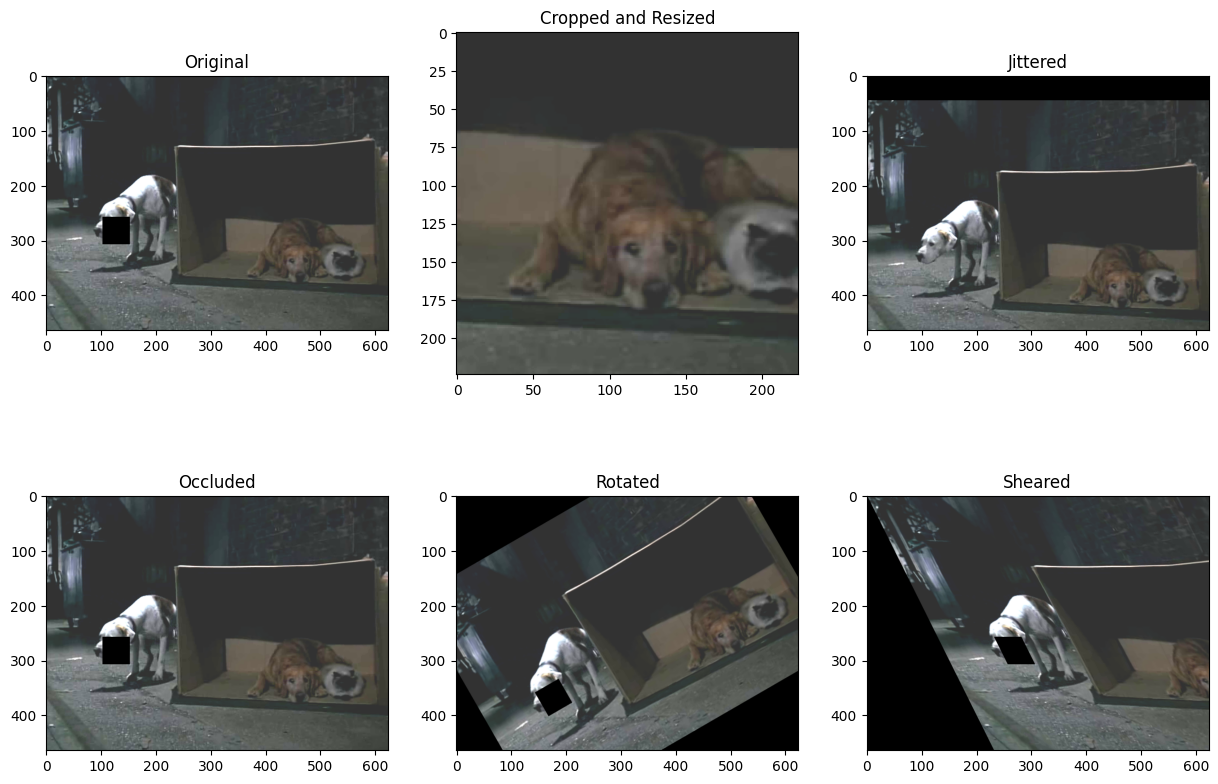

In [52]:
# create a new directory to save the images
new_data_path = '../data/ExDark2'
if not os.path.exists(new_data_path):
    os.makedirs(new_data_path)

for subdir in subdirs:
    subdir_path = os.path.join(data_path, subdir)
    images = os.listdir(subdir_path)
    for image in images:
        subdir_path = os.path.join(data_path, subdir)
        image_path = os.path.join(subdir_path, image)
        img = cv2.imread(image_path)
        # Crop and resize
        cropped_resized = crop_and_resize(img, crop_size, resize_size)
        # Jitter
        jittered = jitter(img, jitter_size)
        # Occlude
        occluded = occlude(img, occlude_size)
        # Rotate
        rotated = rotate(img, angle)
        # Shear
        sheared = shear(img, shear_factor)
        # Save the images
        cv2.imwrite(os.path.join(new_data_path, 'cropped_resized_' + image), cropped_resized)
        cv2.imwrite(os.path.join(new_data_path, 'jittered_' + image), jittered)
        cv2.imwrite(os.path.join(new_data_path, 'occluded_' + image), occluded)
        cv2.imwrite(os.path.join(new_data_path, 'rotated_' + image), rotated)
        cv2.imwrite(os.path.join(new_data_path, 'sheared_' + image), sheared)

        # Display the images
        plt.figure()
        plt.figure(figsize=(15, 10))
        plt.subplot(231)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('Original')
        plt.subplot(232)
        plt.imshow(cv2.cvtColor(cropped_resized, cv2.COLOR_BGR2RGB))
        plt.title('Cropped and Resized')
        plt.subplot(233)
        plt.imshow(cv2.cvtColor(jittered, cv2.COLOR_BGR2RGB))
        plt.title('Jittered')
        plt.subplot(234)
        plt.imshow(cv2.cvtColor(occluded, cv2.COLOR_BGR2RGB))
        plt.title('Occluded')
        plt.subplot(235)
        plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
        plt.title('Rotated')
        plt.subplot(236)
        plt.imshow(cv2.cvtColor(sheared, cv2.COLOR_BGR2RGB))
        plt.title('Sheared')
        plt.show()    
        break
    break